In [66]:
import pandas as pd
from scipy.io import loadmat
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = loadmat('./machine-learning-ex7/ex7/ex7data2.mat')
X = data['X']
X

array([[ 1.84207953,  4.6075716 ],
       [ 5.65858312,  4.79996405],
       [ 6.35257892,  3.2908545 ],
       [ 2.90401653,  4.61220411],
       [ 3.23197916,  4.93989405],
       [ 1.24792268,  4.93267846],
       [ 1.97619886,  4.43489674],
       [ 2.23454135,  5.05547168],
       [ 2.98340757,  4.84046406],
       [ 2.97970391,  4.80671081],
       [ 2.11496411,  5.37373587],
       [ 2.12169543,  5.20854212],
       [ 1.5143529 ,  4.77003303],
       [ 2.16979227,  5.27435354],
       [ 0.41852373,  4.88312522],
       [ 2.47053695,  4.80418944],
       [ 4.06069132,  4.99503862],
       [ 3.00708934,  4.67897758],
       [ 0.66632346,  4.87187949],
       [ 3.1621865 ,  4.83658301],
       [ 0.51155258,  4.91052923],
       [ 3.1342801 ,  4.96178114],
       [ 2.04974595,  5.6241395 ],
       [ 0.66582785,  5.24399257],
       [ 1.01732013,  4.84473647],
       [ 2.17893568,  5.29758701],
       [ 2.85962615,  5.26041997],
       [ 1.30882588,  5.30158701],
       [ 0.99253246,

In [3]:
import os
os.listdir('./machine-learning-ex7/ex7/')

['bird_small.mat',
 'bird_small.png',
 'computeCentroids.m',
 'displayData.m',
 'drawLine.m',
 'ex7.m',
 'ex7data1.mat',
 'ex7data2.mat',
 'ex7faces.mat',
 'ex7_pca.m',
 'featureNormalize.m',
 'findClosestCentroids.m',
 'kMeansInitCentroids.m',
 'lib',
 'pca.m',
 'plotDataPoints.m',
 'plotProgresskMeans.m',
 'projectData.m',
 'recoverData.m',
 'runkMeans.m',
 'submit.m']

In [4]:
# 1.1 for every X, find the cloest centroid C
def find_closest_centroids(X, centroids):
    m = X.shape[0]
    k = centroids.shape[0]
    idx = np.zeros(m)
    
    for i in range(m):
        min_dist = float('inf')
        for j in range(k):
            dist = np.sum((X[i,:]-centroids[j,:]) ** 2)
            if dist < min_dist:
                min_dist = dist
#                 第i个样本，离j中心点最近
                idx[i] = j
    return idx    

In [28]:
initial_centroids = np.array([[3, 3], [6, 2], [8, 5]])
initial_centroids

array([[3, 3],
       [6, 2],
       [8, 5]])

In [13]:
# idx代表每一个X，距离最近的centroid的编号
# idx 的length和m相同。 

idx = find_closest_centroids(X, initial_centroids)
idx[0:3]

array([0., 2., 1.])

In [7]:
# 1.2 聚类中心只是当前分配给簇的所有样本的平均值
data2 = pd.DataFrame(data['X'], columns=['X1', 'X2'])
data2

,X1,X2
0,1.842080,4.607572
1,5.658583,4.799964
2,6.352579,3.290854
3,2.904017,4.612204
4,3.231979,4.939894
...,...,...
295,7.302787,3.380160
296,6.991984,2.987067
297,4.825534,2.779617
298,6.117681,2.854757


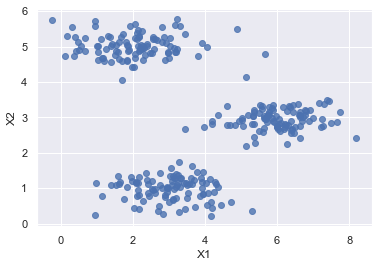

In [8]:
sns.set(color_codes=True)

sns.regplot(x='X1', y='X2', data=data2, fit_reg=False)

In [32]:
# 计算每个簇的中心点
def compute_centroids(X, idx, k):
#     m行，n列
    m, n = X.shape
    centroids = np.zeros((k, n))
    
    for i in range(k):
#         where后面直接条件，返回的是索引
        indices = np.where(idx == i)
        centroids[i,:] = (np.sum(np.array(X)[indices,:], axis=1) / len(indices[0])).ravel()
    
    return centroids

In [33]:
compute_centroids(X, idx, 3)

array([[2.42830111, 3.15792418],
       [5.81350331, 2.63365645],
       [7.11938687, 3.6166844 ]])

In [40]:
# 1.2 K-means on example dataset
# 完全模拟K-means的运算逻辑。 随机初始化-更新centroid-将X分配给新centroid-直至不再变化（簇完全分类完毕)
def run_k_means(X, initial_centroids, max_iters):
    m, n = X.shape
    k = initial_centroids.shape[0]
    idx = np.zeros(m)
    centorids = initial_centroids
    
    for i in range(max_iters):
        idx = find_closest_centroids(X, centorids)
        centorids = compute_centroids(X, idx, k)
    
    return idx, centorids

In [90]:
idx, centroids = run_k_means(X, initial_centroids, 10)

In [91]:
print(idx, centroids)

[0. 2. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 0.] [[1.95399466 5.02557006]
 [3.04367119 1.01541041]
 [6.03366736 3.00052511]]


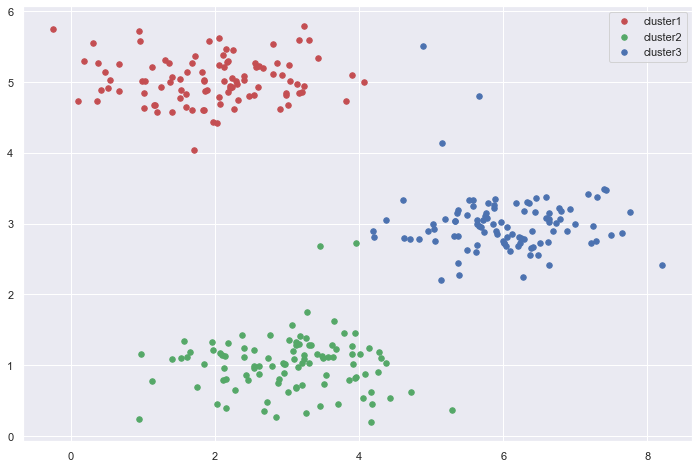

In [93]:
cluster1 = X[np.where(idx == 0)]
cluster2 = X[np.where(idx == 1)]
cluster3 = X[np.where(idx == 2)]


fig, ax = plt.subplots(figsize=(12,8))

ax.scatter(cluster1[:,0], cluster1[:,1], s=30, color='r', label='cluster1')
ax.scatter(cluster2[:,0], cluster2[:,1], s=30, color='g', label='cluster2')
ax.scatter(cluster3[:,0], cluster3[:,1], s=30, color='b', label='cluster3')
plt.legend()


In [76]:
# 创建随机初始化centorid
def init_centroids(X, k):
    m, n = X.shape
    centroids = np.zeros((k, n))
    idx = np.random.randint(0, m, k)
    
    for i in range(k):
        centroids[i,:] = X[idx[i],:]
    
    return centroids

In [86]:
init_centroids(X, 3)

array([[2.55983064, 5.26397756],
       [3.94159139, 0.82577438],
       [2.66046572, 5.19623848]])

172